## **Machine Learning - WNBA Playoffs Prediction**
This notebook will focus on the undestanding of the data. We will be using SQLite to store the data due to its scalability & the fact that it's a relational schema.

https://docs.python.org/3/library/sqlite3.html

Import sqlite3 and connect to database file

### **Imports**

In [1]:
import pandas as pd
import sqlite3
import prep_utils as pu 
import raw_prep_utils as ru
import sys
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### **Database Connection Setup**

In [2]:
db = sqlite3.connect("db/ac.db")
db_cur = db.cursor()

[df_awards, df_coaches, df_players_teams, df_players, df_series_post, df_teams_post, df_teams] = pu.db_to_pandas(db)

previous_seasons = 1

In [3]:
final_rick = pu.calc_team_power_rat(df_players_teams,df_awards,df_players,df_teams,1)
print(final_rick.columns)
#oi = ru.merge_all_raw_data(df_teams,df_players_teams,df_coaches,df_awards,df_teams_post,1)
#print(oi.to_string())


Mean Squared Error for C-F: 0.3002666666666667
Feature importance for C-F:
blocks: 0.23160028867181987
PER: 0.11357928737640569
assists: 0.10276561945808484
ft%: 0.08990075460879474
PPM: 0.07825325780306054
fg%: 0.07731787406234017
turnovers: 0.06661857691491364
oRebounds: 0.05767442752045773
steals: 0.05506133127278745
dRebounds: 0.0382161395981388
PF: 0.0378342977436967
3pt%: 0.02784613411120005
rebounds: 0.016058316278100712
dq: 0.007273694580198957
player_awards: 0.0

Mean Squared Error for G-F: 0.249496875
Feature importance for G-F:
fg%: 0.15651973957853835
dRebounds: 0.12065262880811069
ft%: 0.10328174371366033
turnovers: 0.08424953745702878
PF: 0.08056357653092046
PPM: 0.07500483944240624
PER: 0.06997584647551794
steals: 0.06611170134102802
assists: 0.060510163243889886
oRebounds: 0.052764232471828924
3pt%: 0.0493267491802185
rebounds: 0.045343698651453435
blocks: 0.027027570021859515
dq: 0.006965583744903968
player_awards: 0.0017023893386349776

Mean Squared Error for F-C: 0.

***Prepare Coaches Dataframe***

In [4]:
df_new_coaches = pu.prepare_coaches(df_coaches, df_awards,previous_seasons)
df_new_coaches = pu.group_coaches(df_new_coaches)
print(df_new_coaches.to_string())

Dropping Attribute lgID in Coaches...
Creating attribute coach previous regular season win ratio...
Creating attribute coach playoffs win ratio...
Creating attribute coach playoffs count...
Creating attribute coach awards count...
Dropping attribute post_wins..
Dropping attribute post_losses..
Dropping attribute won..
Dropping attribute lost..

Coaches Null Verification:
year                    0
tmID                    0
coachID                 0
coach_reg_wr            0
coach_po_wr             0
coach_playoffs_count    0
coach_awards            0
dtype: int64
     year tmID     coachID  coach_reg_wr  coach_po_wr  coach_playoffs_count  coach_awards
0       1  CHA  dunntr01wc      0.000000     0.000000                     0             0
1       1  CLE  hugheda99w      0.000000     0.000000                     0             0
2       1  DET  liebena01w      0.000000     0.000000                     0             0
3       1  HOU  chancva99w      0.000000     0.000000                  

***Prepare Players Dataframe***


In [5]:
df_new_players_teams = pu.prepare_player_teams(df_players_teams,df_awards, previous_seasons)
#df_new_players_teams['PostPER'] = ((df_new_players_teams['PostfgMade'] * 85.910) + (df_new_players_teams['PostSteals'] * 53.897) + (df_new_players_teams['PostthreeMade'] * 51.757) + (df_new_players_teams['PostftMade'] * 46.845) + (df_new_players_teams['PostBlocks'] * 39.190) + (df_new_players_teams['PostoRebounds'] * 39.190) + (df_new_players_teams['PostAssists'] * 34.677) + (df_new_players_teams['PostdRebounds'] * 14.707) - (df_new_players_teams['PostPF'] * 17.174) - ((df_new_players_teams['PostftAttempted'] - df_new_players_teams['PostftMade']) * 20.091) - ((df_new_players_teams['PostfgAttempted'] - df_new_players_teams['PostfgMade']) * 39.190) - (df_new_players_teams['PostTurnovers'] * 53.897)) * (np.where(df_new_players_teams['PostMinutes'] == 0, 0, 1 / df_new_players_teams['PostMinutes']))
print(df_new_players_teams.to_string())
#df_new_players_teams['PER'] = ((df_new_players_teams['fgMade'] * 85.910) + (df_new_players_teams['steals'] * 53.897) + (df_new_players_teams['threeMade'] * 51.757) + (df_new_players_teams['ftMade'] * 46.845) + (df_new_players_teams['blocks'] * 39.190) + (df_new_players_teams['oRebounds'] * 39.190) + (df_new_players_teams['assists'] * 34.677) + (df_new_players_teams['dRebounds'] * 14.707) - (df_new_players_teams['PF'] * 17.174) - ((df_new_players_teams['ftAttempted'] - df_new_players_teams['ftMade']) * 20.091) - ((df_new_players_teams['fgAttempted'] - df_new_players_teams['fgMade']) * 39.190) - (df_new_players_teams['turnovers'] * 53.897)) * (np.where(df_new_players_teams['minutes'] == 0, 0, 1 / df_new_players_teams['minutes']))

Dropping Attribute lgID in Players_Teams...
        playerID  year tmID    GP    GS  minutes  points  oRebounds  dRebounds  rebounds  assists  steals  blocks  turnovers     PF  fgAttempted  fgMade  ftAttempted  ftMade  threeAttempted  threeMade   dq  PostGP  PostGS  PostMinutes  PostPoints  PostoRebounds  PostdRebounds  PostRebounds  PostAssists  PostSteals  PostBlocks  PostTurnovers  PostPF  PostfgAttempted  PostfgMade  PostftAttempted  PostftMade  PostthreeAttempted  PostthreeMade  PostDQ  player_awards
0     abrossv01w     2  MIN   0.0   0.0      0.0     0.0        0.0        0.0       0.0      0.0     0.0     0.0        0.0    0.0          0.0     0.0          0.0     0.0             0.0        0.0  0.0     0.0     0.0          0.0         0.0            0.0            0.0           0.0          0.0         0.0         0.0            0.0     0.0              0.0         0.0              0.0         0.0                 0.0            0.0     0.0              0
1     abrossv01w     3

***Prepare Teams Dataframe***

In [6]:
df_new_teams = pu.prepare_teams(df_teams,df_teams_post,previous_seasons)
print(df_new_teams.to_string())

Dropping divID in Teams...
     year tmID confID  rank  playoff   o_fgm   o_fga  o_ftm  o_fta  o_3pm  o_3pa  o_oreb  o_dreb   o_reb  o_asts   o_pf  o_stl   o_to  o_blk   o_pts   d_fgm   d_fga  d_ftm  d_fta  d_3pm  d_3pa  d_oreb  d_dreb   d_reb  d_asts   d_pf  d_stl   d_to  d_blk   d_pts   min  team_playoffs_count   Winrate  PO_Winrate
0       9  ATL     EA   0.0        0     0.0     0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0     0.0  6825                    0  0.000000    0.000000
1      10  ATL     EA   7.0        1   895.0  2258.0  542.0  725.0  202.0  598.0   340.0   737.0  1077.0   492.0  796.0  285.0  593.0  142.0  2534.0  1014.0  2254.0  679.0  918.0  172.0  502.0   401.0   864.0  1265.0   684.0  726.0  310.0  561.0  134.0  2879.0  6950                    0  0.117647    0.000000
2       1  CHA     EA   0.0        0     0.

In [7]:
df_new_player_rankings = pu.prepare_players_for_ranking(df_players_teams, df_awards)
feature_importance, df_new_players = pu.feature_importance_players(df_new_player_rankings, df_players,df_teams)



Mean Squared Error for C-F: 0.31783333333333336
Feature importance for C-F:
blocks: 0.22714361387925242
PER: 0.12802622895670482
ft%: 0.09049572764932513
assists: 0.08737708417063703
fg%: 0.08248244729145651
PPM: 0.07974070414499472
turnovers: 0.07573727760497596
steals: 0.05375256087487516
dRebounds: 0.045983071373056135
oRebounds: 0.03213682857139152
PF: 0.031607698783108706
3pt%: 0.03140084021657387
rebounds: 0.023466850435824072
dq: 0.009462252861010623
player_awards: 0.0011868131868131866

Mean Squared Error for G-F: 0.24683125
Feature importance for G-F:
dRebounds: 0.13406368247618713
fg%: 0.1270416471083741
ft%: 0.11055242180175061
turnovers: 0.09263934984013866
PF: 0.08421388410069683
assists: 0.06986008394995331
PPM: 0.06767066386157256
steals: 0.06358046677657107
oRebounds: 0.061035282599272635
PER: 0.05815448367513532
3pt%: 0.05567624929883351
rebounds: 0.03582199121234733
blocks: 0.03319226491775186
dq: 0.005104603949977737
player_awards: 0.0013929244314372798

Mean Square

In [8]:
dfp_copy = df_new_players.copy()

df_rating_regular = pu.ranking_players(feature_importance, dfp_copy)
print('Best players in the regular season: ')
print(df_rating_regular)


Best players in the regular season: 
        playerID  year    rating
1074  jacksla01w     8  0.509976
1155  parkeca01w     9  0.509002
1580  catchta01w     3  0.505970
687   griffyo01w     1  0.505062
204   jacksla01w     4  0.497605
...          ...   ...       ...
934   robincr01w     8  0.039496
543   berezva01w     9  0.039462
860   weberma01w     8  0.039456
959   oneilkr01w     9  0.036717
1531  chambco01w     8  0.000000

[1805 rows x 3 columns]


In [9]:
df_rating_playoffs = pu.ranking_playoff_players(feature_importance, dfp_copy)
print('Best players in the playoffs: ')
print(df_rating_playoffs)

Best players in the playoffs: 
        playerID  year  PostRating
395    zollsh01w     9    0.060324
1393  zirkozu01w     4    0.060324
657   zellosh01w    10    0.356134
835    zarafr01w     6    0.361048
1322  zakalok01w     1    0.046741
...          ...   ...         ...
33    abrossv01w     5    0.231253
45    abrossv01w     6    0.074264
59    abrossv01w     7    0.074264
81    abrossv01w     9    0.241049
0     abrossv01w     2    0.074264

[1805 rows x 3 columns]


In [10]:
df_new_players = pd.merge(df_new_players, df_rating_regular, on=['playerID', 'year'], how='left')
df_new_players = pd.merge(df_new_players, df_rating_playoffs, on=['playerID', 'year'], how='left')
ratings = pu.team_player_ratings(df_new_players, df_teams)
ratings2 = pd.merge(ratings, df_teams[['year', 'tmID', 'playoff','rank','confID']], on=['year', 'tmID'], how='left')
sorted_power_ratings = ratings2.sort_values(by=['year', 'cum_power_rating'], ascending=False)


top_teams_by_year = sorted_power_ratings.groupby('year').head(8)

playoffs_made_by_year = top_teams_by_year.groupby('year')['playoff'].apply(lambda x: (x == 'Y').sum()).reset_index()

for index, row in playoffs_made_by_year.iterrows():
    print('Year ' + str(row['year']) + ' based on Power Ratings ' + str(row['playoff']) + '/8 best teams made the playoffs')

print('Ranking System Accuracy: ' + str(playoffs_made_by_year['playoff'].sum()/ (8*len(playoffs_made_by_year))) + '%')

Year 1 based on Power Ratings 3/8 best teams made the playoffs
Year 2 based on Power Ratings 5/8 best teams made the playoffs
Year 3 based on Power Ratings 5/8 best teams made the playoffs
Year 4 based on Power Ratings 5/8 best teams made the playoffs
Year 5 based on Power Ratings 5/8 best teams made the playoffs
Year 6 based on Power Ratings 5/8 best teams made the playoffs
Year 7 based on Power Ratings 7/8 best teams made the playoffs
Year 8 based on Power Ratings 5/8 best teams made the playoffs
Year 9 based on Power Ratings 5/8 best teams made the playoffs
Year 10 based on Power Ratings 6/8 best teams made the playoffs
Ranking System Accuracy: 0.6375%


In [11]:

power_ratings = pu.team_power_rating(df_teams, df_new_players)
sorted_power_ratings = power_ratings.sort_values(by=['year', 'PowerRating'], ascending=[True, False])
    
print(sorted_power_ratings)
# Group by year and select the top 6 teams
top_teams_by_year = sorted_power_ratings.groupby('year').head(8)

# Count how many of the top 8 teams for each year made the playoffs
playoffs_made_by_year = top_teams_by_year.groupby('year')['playoff'].apply(lambda x: (x == 'Y').sum()).reset_index()

# Print or use the results
for index, row in playoffs_made_by_year.iterrows():
    print('Year ' + str(row['year']) + ' based on Power Ratings ' + str(row['playoff']) + '/8 best teams made the playoffs')

print('Ranking System Accuracy: ' + str(playoffs_made_by_year['playoff'].sum()/ (8*len(playoffs_made_by_year))) + '%')

     year tmID  PowerRating playoff  rank
5       1  LAS     0.644830       Y     1
3       1  HOU     0.635132       Y     2
8       1  NYL     0.634964       Y     1
12      1  SAC     0.608306       Y     3
15      1  WAS     0.595888       Y     4
..    ...  ...          ...     ...   ...
136    10  NYL     0.530741       N     7
139    10  SAS     0.530657       Y     4
131    10  CON     0.520126       N     6
130    10  CHI     0.509038       N     5
138    10  SAC     0.459849       N     6

[142 rows x 5 columns]
Year 1 based on Power Ratings 8/8 best teams made the playoffs
Year 2 based on Power Ratings 8/8 best teams made the playoffs
Year 3 based on Power Ratings 8/8 best teams made the playoffs
Year 4 based on Power Ratings 7/8 best teams made the playoffs
Year 5 based on Power Ratings 7/8 best teams made the playoffs
Year 6 based on Power Ratings 7/8 best teams made the playoffs
Year 7 based on Power Ratings 7/8 best teams made the playoffs
Year 8 based on Power Ratings 7

In [12]:
best_colleges = pu.best_colleges(df_players_teams,df_teams,df_players)


print(best_colleges)

                    college  TotalPlayoffAppearances  CollegeRank
88                Tennessee                       21            1
17              Connecticut                       17            2
31                  Georgia                       15            3
86                 Stanford                       12            4
48           Louisiana Tech                       11            5
..                      ...                      ...          ...
80               Seton Hall                        1           14
25    Florida International                        1           14
82     Southern Mississippi                        1           14
50                    Maine                        1           14
0   Academy of Sport Moscow                        1           14

[113 rows x 3 columns]


In [13]:
awards = pu.player_awards(df_new_players,df_awards)


# get a player, order by year
player = awards[awards['playerID'] == 'leslili01w']
player = player.sort_values(by=['year'], ascending=[True])

print(player)


        playerID  year  award  cumulative_awards
2750  leslili01w     1      0                0.0
2751  leslili01w     2      3                0.0
2752  leslili01w     3      2                3.0
2753  leslili01w     4      0                5.0
2754  leslili01w     5      2                5.0
2755  leslili01w     6      0                7.0
2756  leslili01w     7      2                7.0
2757  leslili01w     8      0                9.0
2758  leslili01w     9      1                9.0
2759  leslili01w    10      0               10.0


In [14]:
teams = pu.team_ratings(sorted_power_ratings,3)
team = teams[teams['tmID'] == 'HOU']
print(team)

     year tmID  PowerRating playoff  rank  cum_Rating
3       1  HOU     0.635132       Y     2    0.000000
19      2  HOU     0.560558       Y     4    0.635132
35      3  HOU     0.549157       Y     2    0.597845
52      4  HOU     0.587047       Y     2    0.581616
65      5  HOU     0.500235       N     6    0.565587
78      6  HOU     0.518784       Y     3    0.545480
92      7  HOU     0.538879       Y     3    0.535355
105     8  HOU     0.523448       N     5    0.519299
119     9  HOU     0.500755       N     5    0.527037


In [15]:
colleges = pu.teams_colleges(df_new_players,best_colleges,df_teams)

colleges = colleges[colleges['tmID'] == 'IND']

ordered_colleges = colleges.sort_values(by=['year', 'CollegeRank'], ascending=[True, True])

print(ordered_colleges)

   tmID  year  CollegeRank   min  rank
43  IND     1     5.168872  6425     7
44  IND     2     5.448031  6475     6
45  IND     3     4.569650  6425     4
46  IND     4     5.996073  6875     5
47  IND     5     6.759708  6850     6
48  IND     6     4.771264  6925     2
49  IND     7     7.064672  6850     3
50  IND     8     8.205236  6875     2
51  IND     9     6.474676  6950     4
52  IND    10     6.009819  6925     1


Final Table for Testing

In [16]:
merged_data = pu.merge_all_data(df_new_coaches,df_new_teams,df_new_players_teams, ratings)
merged_data.drop('coachID',axis = 1, inplace = True)
merged_data = merged_data[merged_data['year'] != 1]



merged_data = pd.merge(merged_data, final_rick, on=['tmID', 'year'], how='left')

### **Feature Selection**
We will preparate the data in each table, by cleaning & formatting it so that it can be easily used by the machine learning models afterwards.

     year tmID confID  rank  playoff  team_playoffs_count   Winrate  PO_Winrate  coach_reg_wr  coach_po_wr  coach_playoffs_count  coach_awards  cum_power_rating  cum_Rating
0       9  ATL     EA   0.0        0                    0  0.000000    0.000000      0.000000     0.000000                     0             0          0.000000    0.000000
1      10  ATL     EA   7.0        1                    0  0.117647    0.000000      0.117647     0.000000                     0             0          0.154906    0.414622
2       2  CHA     EA   8.0        1                    0  0.250000    0.000000      0.281250     0.000000                     0             0          0.414838    0.517132
3       3  CHA     EA   4.0        1                    1  0.562500    0.500000      0.562500     0.500000                     1             0          0.551590    0.611218
4       4  CHA     EA   2.0        1                    2  0.562500    0.000000      0.000000     0.000000                     0       

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

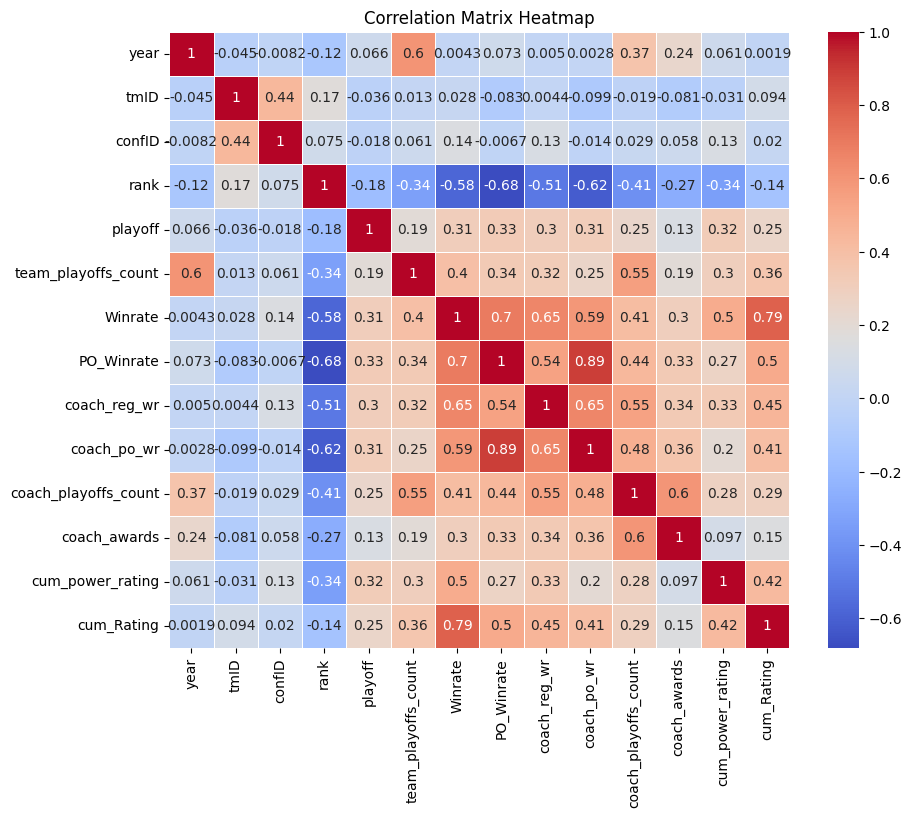

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

import time

from sklearn.decomposition import PCA

import feature_selection as fs

label_encoder = LabelEncoder()

columns = ['o_fgm', 'o_fga', 'o_ftm', 'o_fta',
       'o_3pm', 'o_3pa', 'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_pf',
       'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta',
       'd_3pm', 'd_3pa', 'd_oreb', 'd_dreb', 'd_reb', 'd_asts', 'd_pf',
       'd_stl', 'd_to', 'd_blk', 'd_pts', 'min','p_GP', 'p_GS', 'p_minutes',
       'p_points', 'p_oRebounds', 'p_dRebounds', 'p_rebounds', 'p_assists',
       'p_steals', 'p_blocks', 'p_turnovers', 'p_PF', 'p_fgAttempted',
       'p_fgMade', 'p_ftAttempted', 'p_ftMade', 'p_threeAttempted',
       'p_threeMade', 'p_dq', 'p_PostGP', 'p_PostGS', 'p_PostMinutes',
       'p_PostPoints', 'p_PostoRebounds', 'p_PostdRebounds', 'p_PostRebounds',
       'p_PostAssists', 'p_PostSteals', 'p_PostBlocks', 'p_PostTurnovers',
       'p_PostPF', 'p_PostfgAttempted', 'p_PostfgMade', 'p_PostftAttempted',
       'p_PostftMade', 'p_PostthreeAttempted', 'p_PostthreeMade', 'p_PostDQ',
       'p_player_awards']



merged_data = merged_data.drop(columns=columns, axis=1)

"""
merged_data.drop(columns=['o_fgm', 'o_fga', 'o_ftm', 'o_fta',
       'o_3pm', 'o_3pa', 'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_pf',
       'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta',
       'd_3pm', 'd_3pa', 'd_oreb', 'd_dreb', 'd_reb', 'd_asts', 'd_pf',
       'd_stl', 'd_to', 'd_blk', 'd_pts', 'min','p_minutes'], axis = 1, inplace = True)
"""

# Sort by team and year
merged_data = merged_data.sort_values(by=['tmID', 'year'], ascending=[True, True])
print(merged_data.to_string())

merged_data['tmID'] = label_encoder.fit_transform(merged_data['tmID'])
merged_data['confID'] = label_encoder.fit_transform(merged_data['confID'])
correlation_matrix = merged_data.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
#plt.show()
#merged_data = fs.aggregate_stats_features(merged_data)


In [18]:

x = merged_data.drop('playoff', axis=1)
y = merged_data['playoff']
scale= MinMaxScaler()
x = scale.fit_transform(x)
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Create a dictionary of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42),
    'Multinomial Naive Bayes': MultinomialNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


# Create dictionaries to store the best results for each model
best_accuracy = {}
best_auc = {}
best_time = {}

for name, clf in classifiers.items():
    best_accuracy[name] = 0
    best_auc[name] = 0
    best_time[name] = sys.maxsize

# Run each model num_runs number of times and save the best result for each model

for name, clf in classifiers.items():
    start = time.time()
    clf.fit(x_train, y_train)
    end = time.time()
    # Calculate the time to train the model
    time_to_train = end - start
    # Make predictions on the test set
    y_pred = clf.predict(x_test)
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    # Calculate the AUC
    auc = roc_auc_score(y_test, y_pred)
    # Check if this run had better accuracy than previous runs
    if accuracy > best_accuracy[name]:
        best_accuracy[name] = accuracy
        
    # Check if this run had better AUC than previous runs
    if auc > best_auc[name]:
        best_auc[name] = auc
    # Check if this run had better time than previous runs
    if time_to_train < best_time[name]:
        best_time[name] = time_to_train



# Print the best results for each model
for name in classifiers.keys():
    print(name + ':')
    print('Best Accuracy: ' + str(best_accuracy[name]))
    print('Best AUC: ' + str(best_auc[name]))
    print('Best Time: ' + str(best_time[name]))
    print('')

Random Forest:
Best Accuracy: 0.6923076923076923
Best AUC: 0.69375
Best Time: 0.07400131225585938

Logistic Regression:
Best Accuracy: 0.7307692307692307
Best AUC: 0.6875
Best Time: 0.0020003318786621094

Support Vector Machine:
Best Accuracy: 0.6538461538461539
Best AUC: 0.56875
Best Time: 0.0009996891021728516

Gradient Boosting:
Best Accuracy: 0.5769230769230769
Best AUC: 0.5625
Best Time: 0.0429997444152832

XGBoost:
Best Accuracy: 0.6153846153846154
Best AUC: 0.6125
Best Time: 0.08999848365783691

Multinomial Naive Bayes:
Best Accuracy: 0.6153846153846154
Best AUC: 0.575
Best Time: 0.0009989738464355469

K-Nearest Neighbors:
Best Accuracy: 0.5769230769230769
Best AUC: 0.54375
Best Time: 0.0



### Point-Biserial Correlation


In [19]:
from scipy import stats

# Define your binary variable and continuous variables
binary_variable = merged_data['playoff']


# List of continuous variables you want to calculate point-biserial correlation for
continuous_variables = [
    'rank', 'team_playoffs_count', 'Winrate',
    'PO_Winrate', 'coach_reg_wr', 'coach_po_wr', 'coach_playoffs_count',
    'coach_awards', 'cum_power_rating', 'cum_Rating',
]

# Create an empty dictionary to store point-biserial correlations
point_biserial_correlations = {}

# Calculate point-biserial correlation for each variable
for variable in continuous_variables:
    correlation, p_value = stats.pointbiserialr(binary_variable, merged_data[variable])
    point_biserial_correlations[variable] = correlation

# Print the point-biserial correlations
for variable, correlation in point_biserial_correlations.items():
    print(f"Point-Biserial Correlation for {variable}: {correlation}")

Point-Biserial Correlation for rank: -0.18007660750675125
Point-Biserial Correlation for team_playoffs_count: 0.1910179453435165
Point-Biserial Correlation for Winrate: 0.3104875732212889
Point-Biserial Correlation for PO_Winrate: 0.32717700817953643
Point-Biserial Correlation for coach_reg_wr: 0.3046846579430389
Point-Biserial Correlation for coach_po_wr: 0.312640787276942
Point-Biserial Correlation for coach_playoffs_count: 0.2450451464184315
Point-Biserial Correlation for coach_awards: 0.12925912266482092
Point-Biserial Correlation for cum_power_rating: 0.3190238752175404
Point-Biserial Correlation for cum_Rating: 0.24828942852595592


### Principal Component Analysis

In [20]:

# Initialize PCA with the number of components you want to keep
n_components = 10  # Adjust this value as needed
pca = PCA(n_components=n_components)

# Fit and transform the data on both the training and test sets
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Now you can use x_train_pca and x_test_pca in your classifiers

# Create a dictionary of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42),

    'K-Nearest Neighbors': KNeighborsClassifier()
}
# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(x_train_pca, y_train)
    predictions = clf.predict(x_test_pca)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy with PCA: {accuracy}")

Random Forest Accuracy with PCA: 0.7307692307692307
Logistic Regression Accuracy with PCA: 0.6923076923076923
Support Vector Machine Accuracy with PCA: 0.7307692307692307
Gradient Boosting Accuracy with PCA: 0.7692307692307693
XGBoost Accuracy with PCA: 0.7692307692307693
K-Nearest Neighbors Accuracy with PCA: 0.6538461538461539


### Lasso

In [21]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_iris
x = merged_data.drop('playoff', axis=1)
y = merged_data['playoff']

# Create a Lasso model with a regularization parameter (alpha)
lasso = Lasso(alpha=0.1)

# Fit the model on your data
lasso.fit(x, y)

# Get the feature importances (coefficients)
feature_importances = lasso.coef_

# Print the feature importances
print("Feature Importances (Coefficients):")
for feature, importance in zip(x.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances (Coefficients):
year: 0.0
tmID: -0.0
confID: -0.0
rank: -0.009691201011849311
team_playoffs_count: 0.007915701552585048
Winrate: 0.0
PO_Winrate: 0.0
coach_reg_wr: 0.0
coach_po_wr: 0.0
coach_playoffs_count: 0.025677649698031036
coach_awards: 0.0
cum_power_rating: 0.0
cum_Rating: 0.0


### Fisher's Score

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assuming you have a feature matrix X and target vector y
X_new = SelectKBest(score_func=chi2, k=5).fit_transform(x, y)

# Print the shape of X_new
print(X_new.shape)


(126, 5)


### Recursive Feature Elimination

In [23]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # Choose an appropriate estimator
x = merged_data.drop('playoff', axis=1)
y = merged_data['playoff']

# Choose an appropriate estimator (e.g., RandomForestClassifier)
estimator = RandomForestClassifier(random_state=42)

# Create an RFE model
rfe = RFE(estimator, n_features_to_select=13)  # Adjust the number of features as needed

# Fit the RFE model to your data
rfe.fit(x, y)

# Get the selected features
selected_features = x.columns[rfe.support_]

print("Selected features:")
print(selected_features)

# Create a new dataframe with only the selected features
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train[selected_features]
x_test = x_test[selected_features]


clf =   KNeighborsClassifier()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, predictions)


print(f"Accuracy: {accuracy}")





Selected features:
Index(['year', 'tmID', 'confID', 'rank', 'team_playoffs_count', 'Winrate',
       'PO_Winrate', 'coach_reg_wr', 'coach_po_wr', 'coach_playoffs_count',
       'coach_awards', 'cum_power_rating', 'cum_Rating'],
      dtype='object')
Accuracy: 0.8076923076923077


### ANOVA

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # For classification tasks


# Create an ANOVA feature selector
k_best = SelectKBest(score_func=f_classif, k=6)  # Adjust k (number of features) as needed

# Fit the selector to your data
X_new = k_best.fit_transform(x, y)

# Get the selected features
selected_features = x.columns[k_best.get_support()]

print("Selected features:")
print(selected_features)

Selected features:
Index(['Winrate', 'PO_Winrate', 'coach_reg_wr', 'coach_po_wr',
       'cum_power_rating', 'cum_Rating'],
      dtype='object')
